In [68]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import csv
from sklearn.manifold import MDS
# Gute Ergebnisse für DSJR500.1c fitnessBoundary=480, 1000 partcols, time limit 600
# Gute Ergebnisse für queen13_13 fitnessBoundary=350, 1000 partcols, time limit 60
#n = 250
#n = 500
#n = 1000
n = 121
instance = "queen11_11" #DSJC1000.1 ; le450_25d ; DSJC250.5
reader = csv.reader(open(instance+".spaceAnalysis.csv", "r", encoding="ascii"), delimiter=",")
readerFitness = csv.reader(open(instance + ".spaceAnalysisFitness.csv", "r", encoding="ascii"), delimiter=",")
print('done')

done


In [69]:
result = np.array(list(reader)).astype(np.int)
fitness = np.array(list(readerFitness)).astype(np.int)[0]
print(result)
#print(fitness)
print(fitness.shape)

[[ 0  0  0 ... 78 78 78]
 [ 0  0  0 ... 77 77 77]
 [ 0  0  0 ... 77 78 78]
 ...
 [78 77 77 ...  0  0  0]
 [78 77 78 ...  0  0  0]
 [78 77 78 ...  0  0  0]]
(1000,)


# Distribution of Fitness

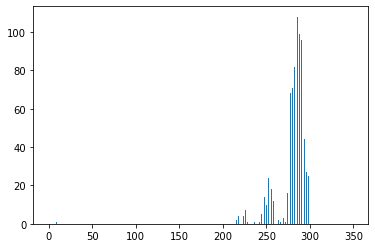

In [70]:
max_fitness = max(fitness)*1.1

x_fit = np.arange(0,350)
y_fit = np.zeros(350)
for i in fitness:
    y_fit[i]+=1

plt.bar(x_fit, y_fit)
plt.show()

# Distribution of Distances

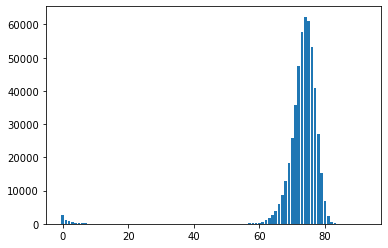

In [73]:
max_dist = max(map(max, result)) * 1.1

x = np.arange(int(max_dist))
y = np.zeros(int(max_dist))
for i in range(0,len(result)):
    for j in range(i+1, len(result)):
        y[int(result[i][j])] += 1

plt.bar(x, y)
plt.show()

In [74]:
embedding = MDS(n_components=3, metric=True, n_init=2, max_iter=300, verbose=0, eps=0.01, n_jobs=None, random_state=None, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(result)
x_vals = X_transformed[:,0]
y_vals = X_transformed[:,1]
z_vals = X_transformed[:,2]
it = np.arange(1,len(result)+1)

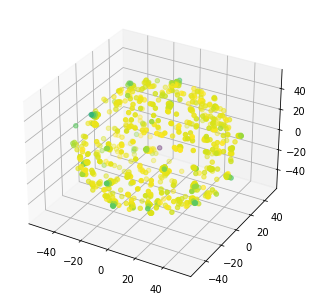

In [75]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_vals, y_vals, z_vals, c=fitness, label=it)
#ax.legend()
plt.show()

In [76]:
embedding = MDS(n_components=2, metric=True, n_init=2, max_iter=300, verbose=0, eps=0.01, n_jobs=None, random_state=None, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(result)
x_vals = X_transformed[:,0]
y_vals = X_transformed[:,1]

/usr/local/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


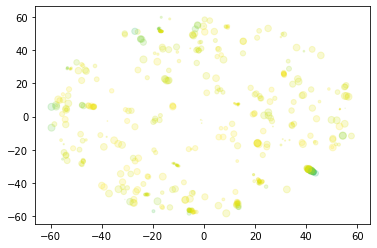

In [77]:
plt.scatter(x_vals, y_vals, z_vals, c=fitness, alpha=0.2)
plt.show()